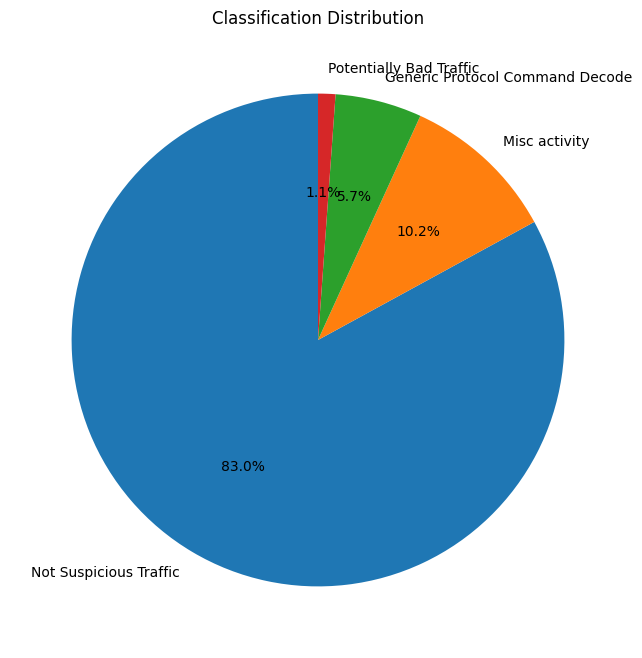

In [1]:
import os
import pandas as pd
import re
import json
import matplotlib.pyplot as plt

def extract_data(file_path):
    """
    Extracts timestamp, event_id, and classification from a text file.

    Args:
        file_path: The path to the text file.

    Returns:
        A pandas DataFrame containing the extracted data, or None if an error occurs.
    """
    try:
        data = {'timestamp': [], 'event_id': [], 'classification': []}
        with open(file_path, 'r') as file:
            json_data = []  # Accumulate JSON objects
            current_json = ""  # Store current JSON object

            for line in file:
                if line.startswith("Received Log: {"):
                    current_json = line[len("Received Log: "):].strip()
                elif line.strip() == "}":
                    current_json += line.strip()  # Append closing brace
                    json_data.append(current_json)  # Add complete JSON
                    current_json = ""  # Reset for next object
                elif current_json:
                    current_json += line.strip()  # Append to current JSON

            for json_str in json_data:
                try:
                    log_data = json.loads(json_str)
                    data['timestamp'].append(log_data['timestamp'])
                    data['event_id'].append(log_data['event_id'])
                    data['classification'].append(log_data['classification'])
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON in line: {json_str}")
                    print(f"Error: {e}")

        return pd.DataFrame(data)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Main execution ---
file_path = r'C:\Users\hisha\Documents\CSCI_4385\message.json'  # Path to input file

df = extract_data(file_path)
if df is not None:
    # Create pie chart
    classification_counts = df['classification'].value_counts()
    plt.figure(figsize=(8, 8))  # Adjust figure size as needed
    plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Classification Distribution')
    plt.show()  # Display the chart

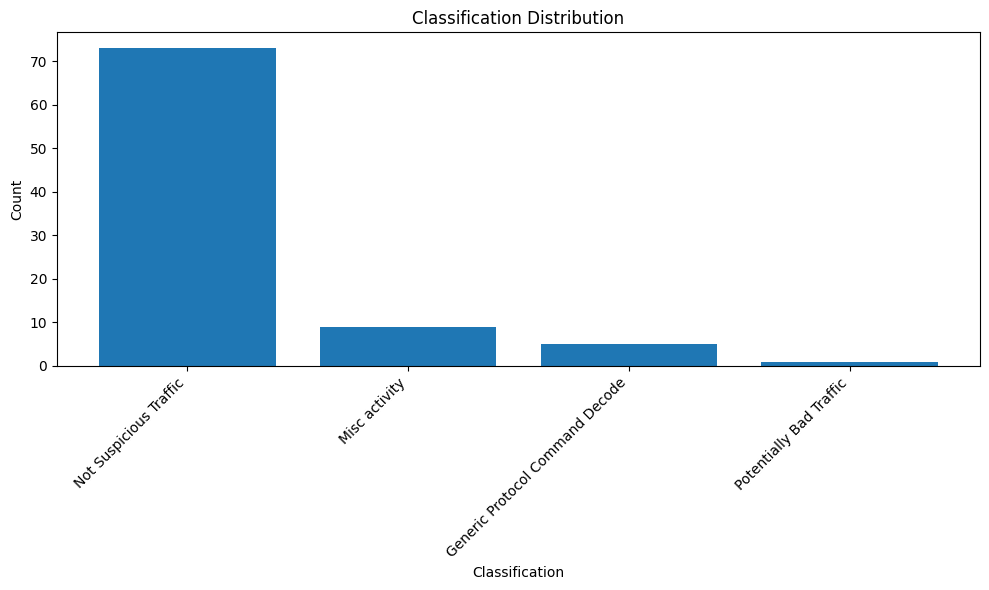

In [2]:
import os
import pandas as pd
import re
import json
import matplotlib.pyplot as plt

def extract_data(file_path):
    """
    Extracts timestamp, event_id, and classification from a text file.

    Args:
        file_path: The path to the text file.

    Returns:
        A pandas DataFrame containing the extracted data, or None if an error occurs.
    """
    try:
        data = {'timestamp': [], 'event_id': [], 'classification': []}
        with open(file_path, 'r') as file:
            json_data = []  # Accumulate JSON objects
            current_json = ""  # Store current JSON object

            for line in file:
                if line.startswith("Received Log: {"):
                    current_json = line[len("Received Log: "):].strip()
                elif line.strip() == "}":
                    current_json += line.strip()  # Append closing brace
                    json_data.append(current_json)  # Add complete JSON
                    current_json = ""  # Reset for next object
                elif current_json:
                    current_json += line.strip()  # Append to current JSON

            for json_str in json_data:
                try:
                    log_data = json.loads(json_str)
                    data['timestamp'].append(log_data['timestamp'])
                    data['event_id'].append(log_data['event_id'])
                    data['classification'].append(log_data['classification'])
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON in line: {json_str}")
                    print(f"Error: {e}")

        return pd.DataFrame(data)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Main execution ---
file_path = r'C:\Users\hisha\Documents\CSCI_4385\message.json'  # Path to input file

df = extract_data(file_path)
if df is not None:
    # Create bar chart
    classification_counts = df['classification'].value_counts()
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(classification_counts.index, classification_counts.values)
    plt.xlabel('Classification')
    plt.ylabel('Count')
    plt.title('Classification Distribution')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()  # Display the chart